In [1]:
#!/usr/bin/env python3
#### Import all the required libraries
import pandas as pd #### Library for working with large datsets
import numpy as np #### Library for performing numerical calculations
import matplotlib.pyplot as plt #### Basic Library for plotting graphs
#### Configuring Matplotlib to show Plots inline
%matplotlib inline 
plt.rcParams['figure.figsize'] = (12, 12) ### Setting the size of the Plots
import seaborn as sb

In [10]:
#### Load the Data File & Check the Data
data = pd.read_csv('HousePrices.csv')
data.info()
data.fillna(0)
data.YearRemodAdd = data.YrSold - data.YearRemodAdd 
data.GarageYrBlt = data.YrSold - data.GarageYrBlt 
data.YearBuilt = data.YrSold - data.YearBuilt 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

In [22]:
data.head

<bound method NDFrame.head of        Id  Dwell_Type Zone_Class  LotFrontage  LotArea Road_Type Alley  \
0       1          60         RL         65.0     8450      Pave   NaN   
1       2          20         RL         80.0     9600      Pave   NaN   
2       3          60         RL         68.0    11250      Pave   NaN   
3       4          70         RL         60.0     9550      Pave   NaN   
4       5          60         RL         84.0    14260      Pave   NaN   
...   ...         ...        ...          ...      ...       ...   ...   
2068  942          60         RL          NaN     8755      Pave   NaN   
2069  943          90         RL         63.0     7711      Pave   NaN   
2070  944          90         RL        313.0    25000      Pave   NaN   
2071  945          20         RL         52.0    14375      Pave   NaN   
2072  946          50         RM         98.0     8820      Pave   NaN   

     Property_Shape LandContour Utilities  ... PoolArea PoolQC  Fence  \
0       

In [4]:
#### Check the Stats for the numeric values
data.describe()
data_describe = data.describe()
data_describe.to_csv('data_describe.csv', index=True)

In [23]:
data.isnull().sum()

Id                       0
Dwell_Type               0
Zone_Class               0
LotFrontage            320
LotArea                  0
                      ... 
MoSold                   0
YrSold                   0
SaleType                 0
SaleCondition            0
Property_Sale_Price      0
Length: 81, dtype: int64

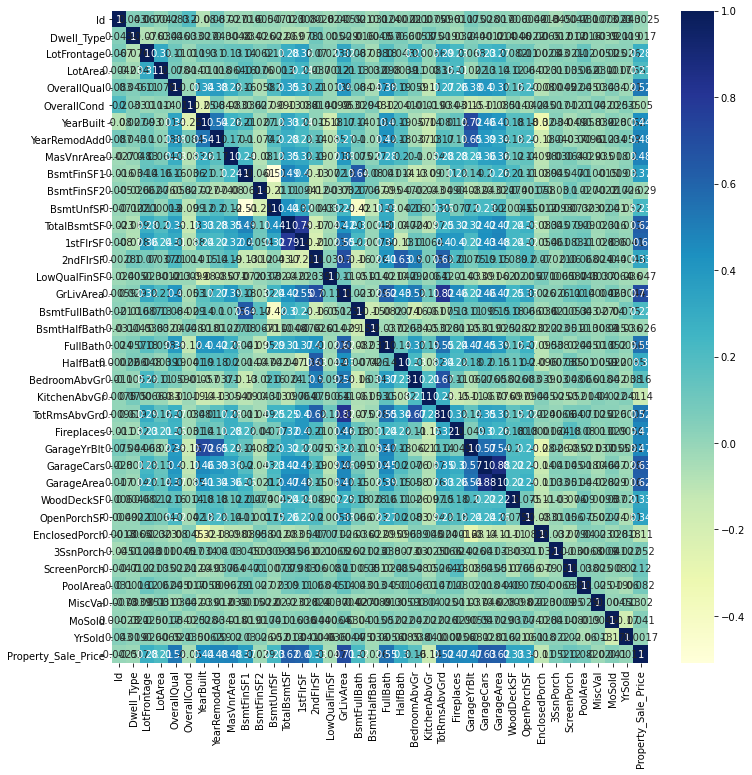

In [5]:
data_corr = data.corr()
data_corr.to_csv('data_corr.csv',index='True')
dataplot = sb.heatmap(data_corr, cmap="YlGnBu", annot=True)
# displaying heatmap
plt.show()

In [6]:
data = data.drop(data.index[data.Dwell_Type > 7000],axis = 0)

<AxesSubplot:xlabel='OpenPorchSF', ylabel='Property_Sale_Price'>

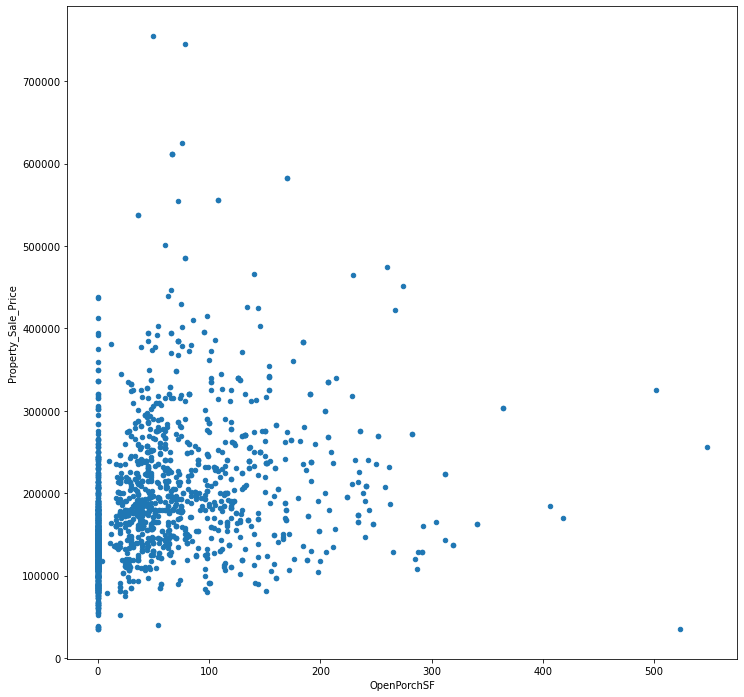

In [9]:
data.plot.scatter(x='OpenPorchSF', y='Property_Sale_Price')

In [11]:
Y = data['Property_Sale_Price'].values

# = data[['GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF',
#        'FullBath','TotRmsAbvGrd','OverallQual','MasVnrArea','YearRemodAdd']]
X = data[['GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF',
'FullBath','TotRmsAbvGrd','OverallQual','MasVnrArea','YearRemodAdd',
'Fireplaces','GarageYrBlt','YearBuilt','BsmtFinSF1','OpenPorchSF',
'2ndFlrSF','WoodDeckSF','HalfBath','LotFrontage']]

X = X.fillna(0)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [12]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [13]:
# Fitting the Linear Regression Model to the dataset
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [14]:
#### Fitting the regressor to our training set
#### y_train.ravel() is used to undo the array.reshape we performed 
#### earlier on the y_train as some of the regressor models dont
#### expect an array for the dependant variable
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = regressor.predict(X_test)

In [16]:
#### Error Metrics
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_test, y_pred)
print(mse)
rms = sqrt(mean_squared_error(y_test, y_pred))
print(rms)

891757014.3508879
29862.300888425994


In [17]:
#### R2 Error
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.8092187992966126


In [18]:
#### Finally Lets Apply k-Fold Cross Validation to see how our model has performed
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())

0.7412851692338054
0.1319698490608471
